In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

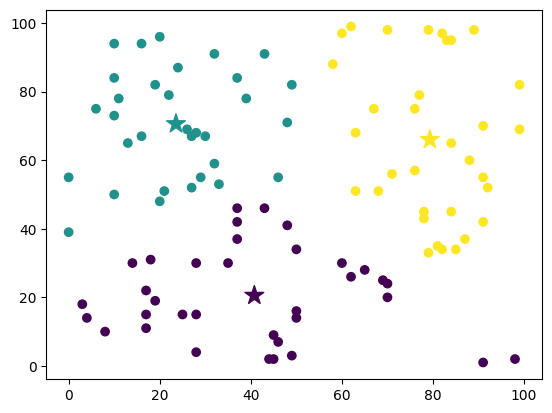

In [ ]:
#Build K-means Clustering from scratch
class KMeansClustering:
    def __init__(self, k = 3):
        self.k = k
        self.cen = None

    @staticmethod
    def euclidean_dis(data_p, cen):
        return np.sqrt(np.sum((cen-data_p)**2, axis=1))
    
    def fit(self, X, max_iterations=200):
        self.cen = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),
                                     size=(self.k, X.shape[1]))
        for _ in range(max_iterations):
            y = []

            for data_p in X:
                distances = KMeansClustering.euclidean_dis(data_p, self.cen)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            
            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_center = []

            for i, indices, in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_center.append(self.cen[i])
                else:
                    cluster_center.append(np.mean(X[indices], axis=0)[0])

            if np.max(self.cen - np.array(cluster_center)) < 0.0001:
                break
            else:
                self.cen = np.array(cluster_center)
        
        return y

random_p = np.random.randint(0, 100, (100, 2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_p)

plt.scatter(random_p[:, 0], random_p[:, 1], c=labels)
plt.scatter(kmeans.cen[:, 0], kmeans.cen[:, 1], c=range(len(kmeans.cen)),
            marker="*", s=200)
plt.show()




In [12]:
img = cv2.imread("360_F_315349043_6ohfFyx37AFusCKZtGQtJR0jqUxhb25Y.jpg")

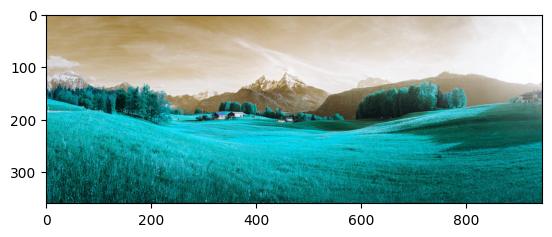

In [13]:
plt.imshow(img)

In [14]:
img.shape

(360, 946, 3)

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

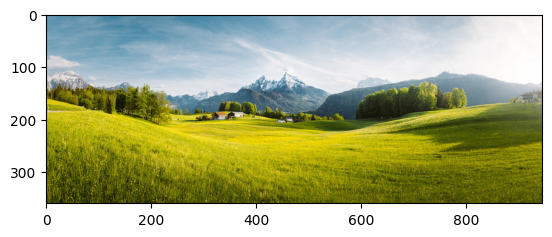

In [16]:
plt.imshow(img)

In [17]:
img_small = cv2.resize(img,(200, 200))
img_np = np.array(img_small)
pixels = img_small.reshape(-1, 3) #(200,200,3) -> (40000,3)

In [18]:
# 3. Apply KMeans
kmeans = KMeansClustering(k=5)
labels = kmeans.fit(pixels)

In [19]:
# 4. Segment the Image
centers = np.uint8(kmeans.cen)
segmented_data = centers[labels]
segmented_img = segmented_data.reshape(img_np.shape)


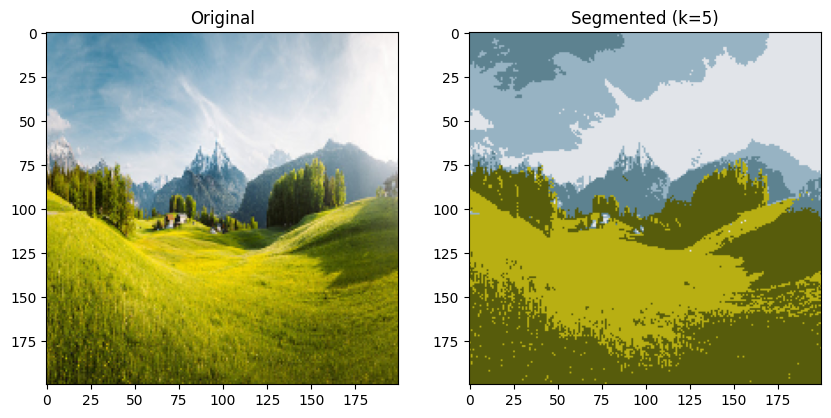

In [20]:
# Visualize the Results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_np)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title("Segmented (k=5)")
plt.show()